# Exploratory Data Analytics
Import the librries and the cleaned dataset. 

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

df = pd.read_csv("Datasets/Cleaned_Dataset.csv", dtype={"timestamp": str})

# Convert timestamp to datetime for time-series plots only
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Columns to include in EDA
numeric_cols = [
    "gps_latitude",
    "gps_longitude",
    "lidar_points",
    "radar_objects",
    "camera_objects",
    "packet_drop_rate",
    "packet_delivery_ratio",
    "latency_ms",
    "throughput_kbps",
    "collision_detected",
    "obstacle_detection_accuracy",
    "decision_accuracy"
]

df_numeric = df[numeric_cols]

## Line Plot of Throughput over Time


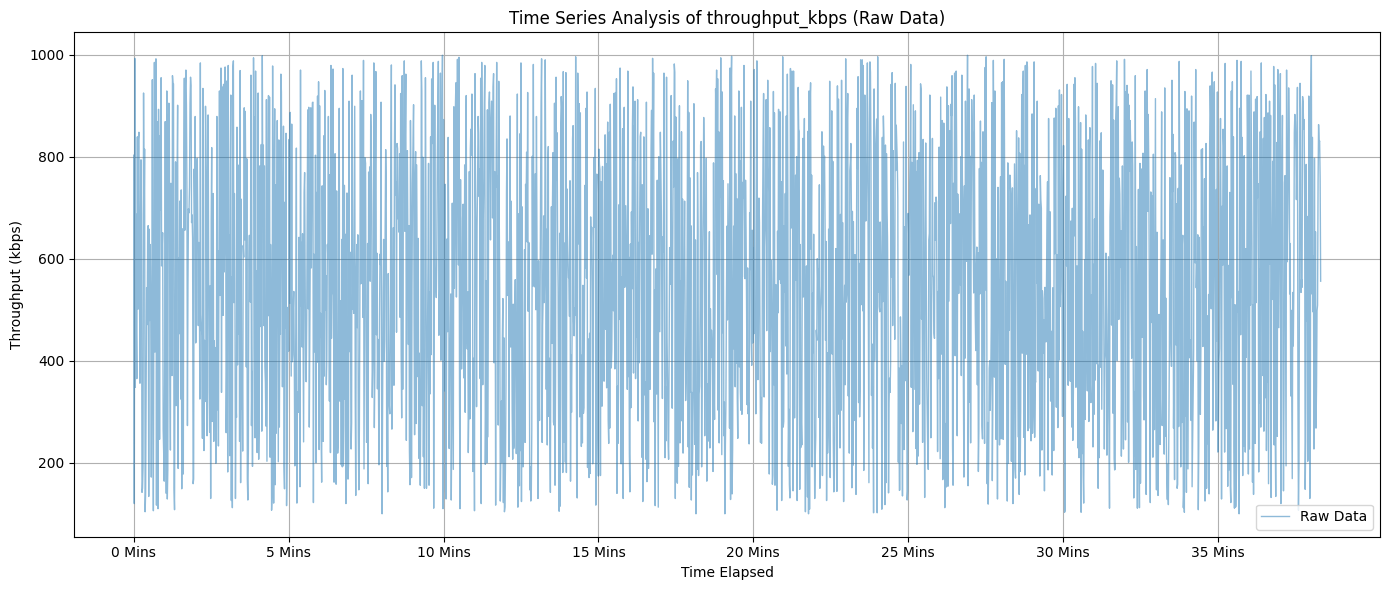

In [19]:
df['time_in_seconds'] = df.index 
df_time_series = df.set_index('timestamp') 

time_series_metric = 'throughput_kbps'

plt.figure(figsize=(14, 6))
plt.plot(df['time_in_seconds'], df[time_series_metric], 
         label='Raw Data', alpha=0.5, linewidth=1)

max_seconds = df['time_in_seconds'].max()
max_minutes = np.ceil(max_seconds / 60) 

tick_locations = np.arange(0, max_seconds + 60, 300) 
tick_labels = [f'{int(s / 60)} Mins' for s in tick_locations]
plt.xticks(tick_locations, tick_labels)

plt.title(f'Time Series Analysis of {time_series_metric} (Raw Data)')
plt.xlabel('Time Elapsed')
plt.ylabel('Throughput (kbps)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
plt.close()

## Line Plot of Throughput over Time with Rolling Mean

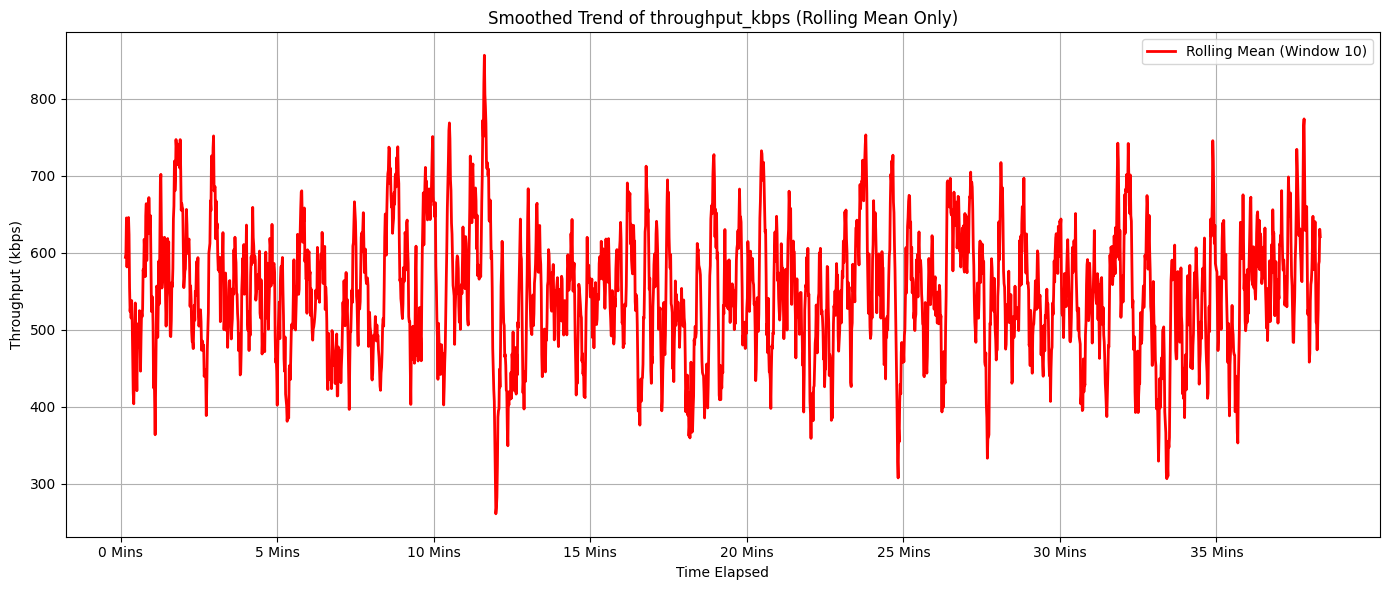

In [20]:
rolling_window = 10
df['rolling_mean'] = df[time_series_metric].rolling(window=rolling_window).mean()

plt.figure(figsize=(14, 6))
plt.plot(df['time_in_seconds'], df['rolling_mean'], 
         color='red', label=f'Rolling Mean (Window {rolling_window})', linewidth=2)

plt.xticks(tick_locations, tick_labels)
plt.title(f'Smoothed Trend of {time_series_metric} (Rolling Mean Only)')
plt.xlabel('Time Elapsed')
plt.ylabel('Throughput (kbps)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
plt.close()

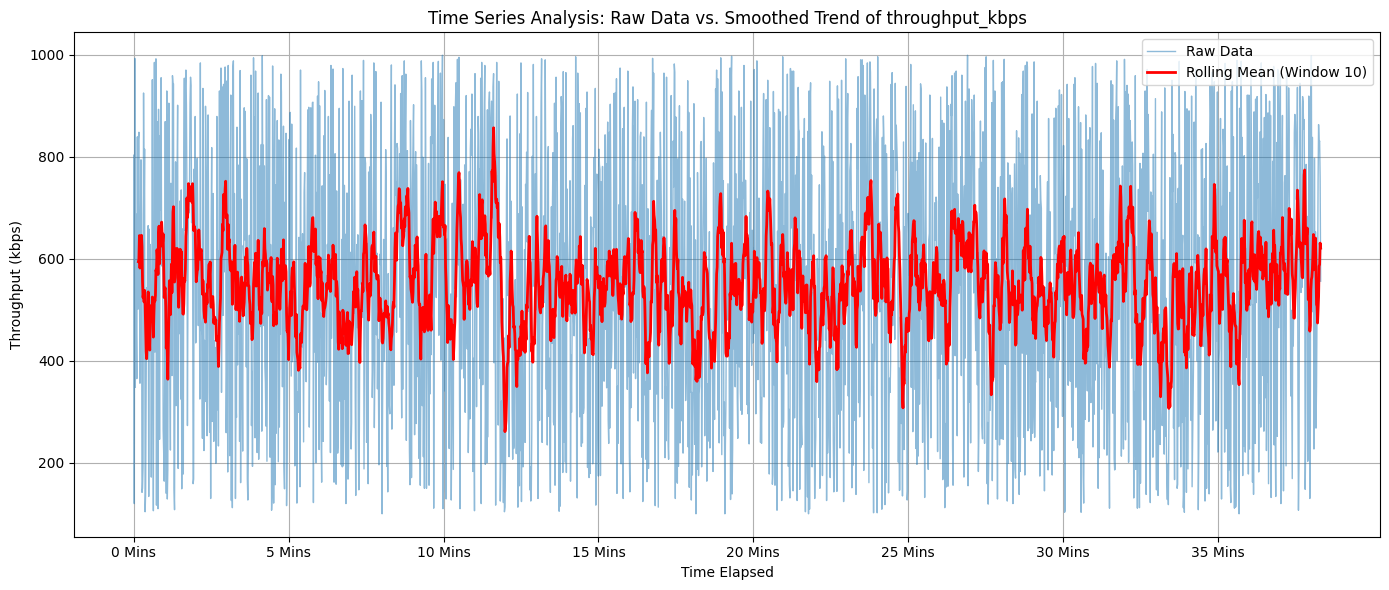

In [21]:
plt.figure(figsize=(14, 6))
plt.plot(df['time_in_seconds'], df[time_series_metric], 
         label='Raw Data', alpha=0.5, linewidth=1)
plt.plot(df['time_in_seconds'], df['rolling_mean'], 
         color='red', label=f'Rolling Mean (Window {rolling_window})', linewidth=2)
plt.xticks(tick_locations, tick_labels) 

plt.title(f'Time Series Analysis: Raw Data vs. Smoothed Trend of {time_series_metric}')
plt.xlabel('Time Elapsed')
plt.ylabel('Throughput (kbps)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
plt.close()

## Seasonal Decomposition

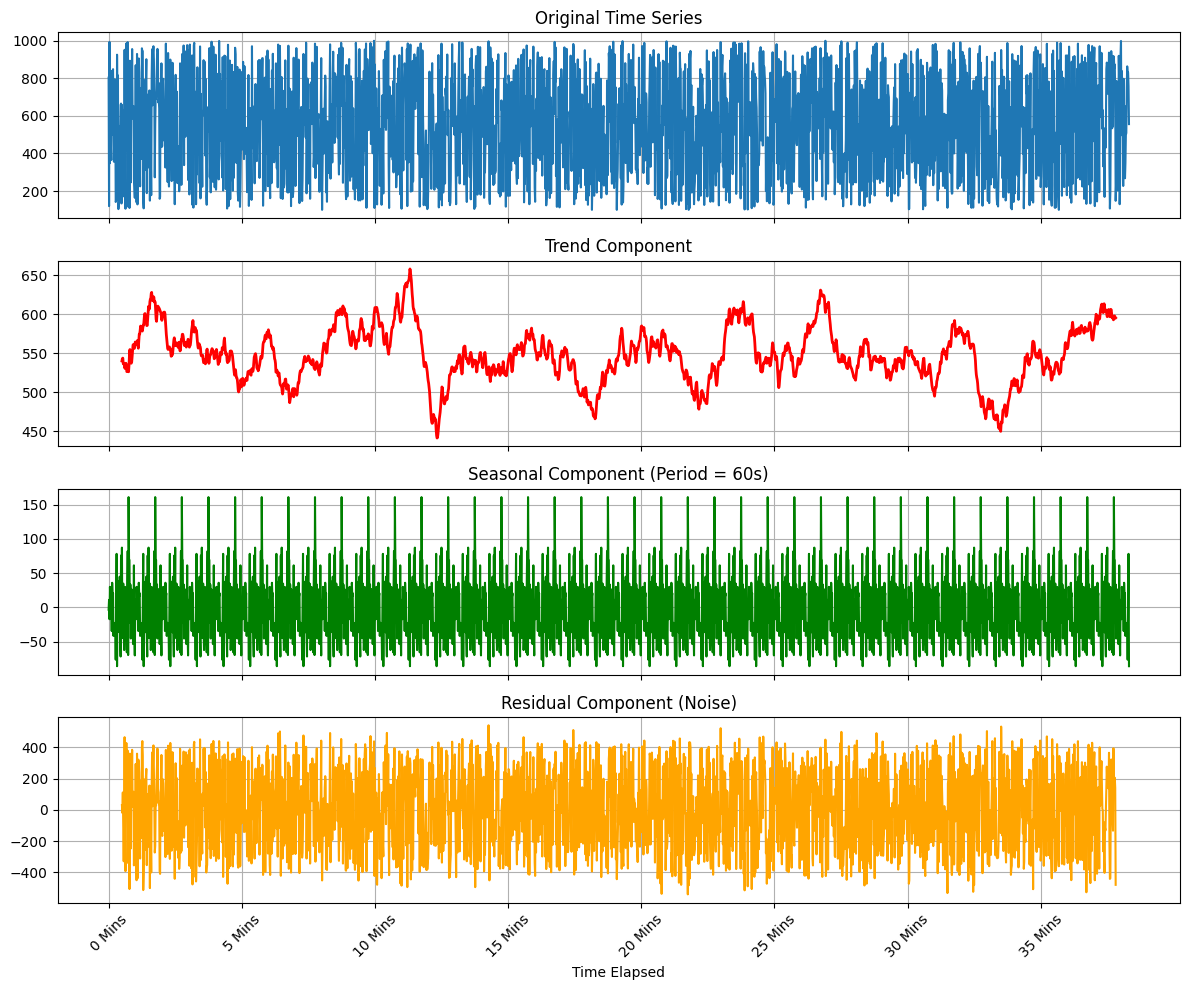

In [22]:
df_indexed = df.set_index('time_in_seconds')
ts = df_indexed['throughput_kbps']

# 2. Perform Seasonal Decomposition (Additive Model)
# We use a period of 60 seconds (1 minute) to search for micro-periodicity
decomposition = seasonal_decompose(ts, model='additive', period=60)

# 3. Plot the decomposed components
fig, axes = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

# Plot 1: Original Time Series
axes[0].plot(ts.index, ts.values, label='Original')
axes[0].set_title('Original Time Series')
axes[0].grid(True)

# Plot 2: Trend Component
axes[1].plot(decomposition.trend.index, decomposition.trend.values, label='Trend', color='red', linewidth=2)
axes[1].set_title('Trend Component')
axes[1].grid(True)

# Plot 3: Seasonal Component
axes[2].plot(decomposition.seasonal.index, decomposition.seasonal.values, label='Seasonal', color='green')
axes[2].set_title('Seasonal Component (Period = 60s)')
axes[2].grid(True)

# Plot 4: Residual Component
axes[3].plot(decomposition.resid.index, decomposition.resid.values, label='Residual', color='orange')
axes[3].set_title('Residual Component (Noise)')
axes[3].grid(True)
axes[3].set_xlabel('Time Elapsed')

# Adjust X-axis to display in minutes for readability (reusing your previous logic)
max_seconds = ts.index.max()
tick_locations = np.arange(0, max_seconds + 60, 300) 
tick_labels = [f'{int(s / 60)} Mins' for s in tick_locations]

for ax in axes:
    ax.set_xticks(tick_locations)
    ax.set_xticklabels(tick_labels)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
plt.close()